## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load Dataset

In [2]:
df = pd.read_csv('student_habits_performance.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1000, 16)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Step 3: Data Cleaning

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


In [4]:
# Remove rows with missing values
df.dropna(inplace=True)
print(f"Shape after cleaning: {df.shape}")

Shape after cleaning: (909, 16)


In [5]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


In [7]:
# Statistical summary
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Step 4: Data Visualization

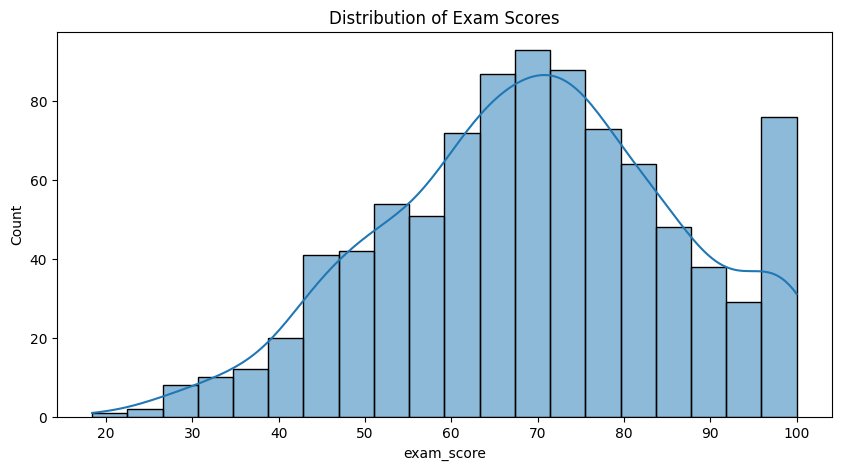

In [8]:
# Distribution of exam scores
plt.figure(figsize=(10, 5))
sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

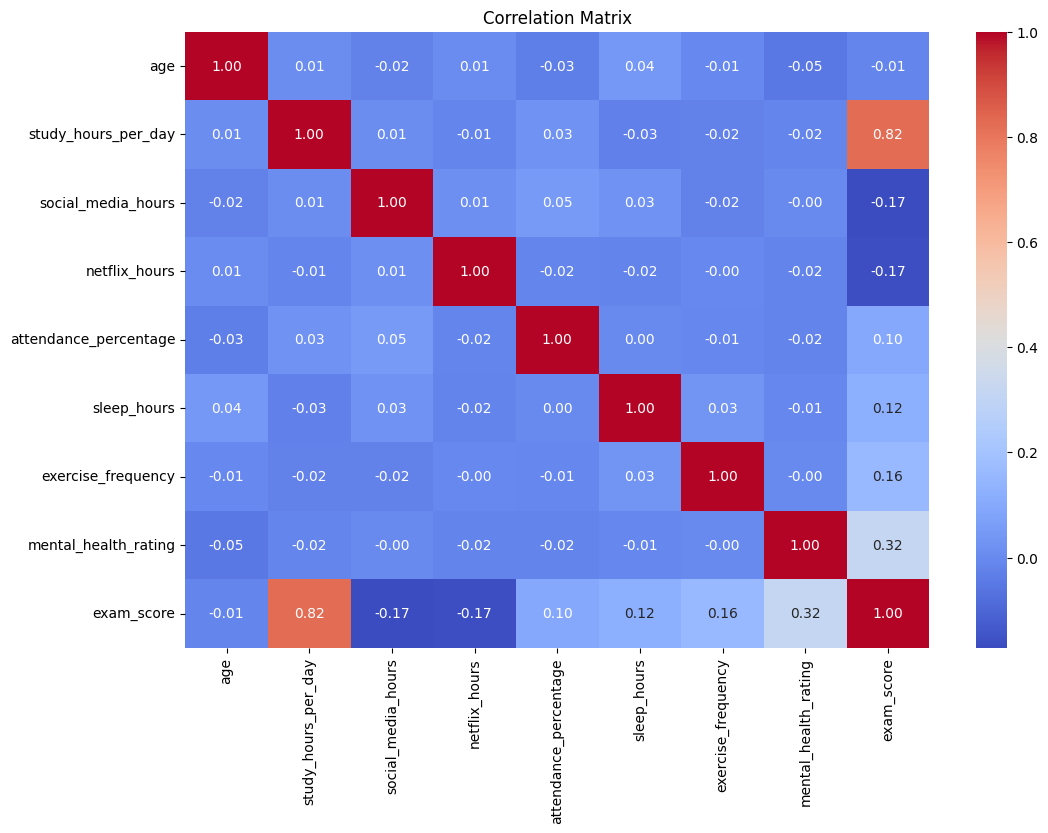

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

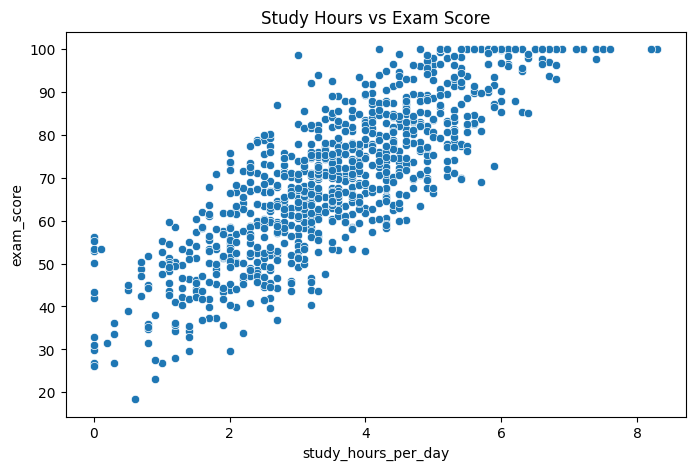

In [10]:
# Study hours vs exam score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title('Study Hours vs Exam Score')
plt.show()

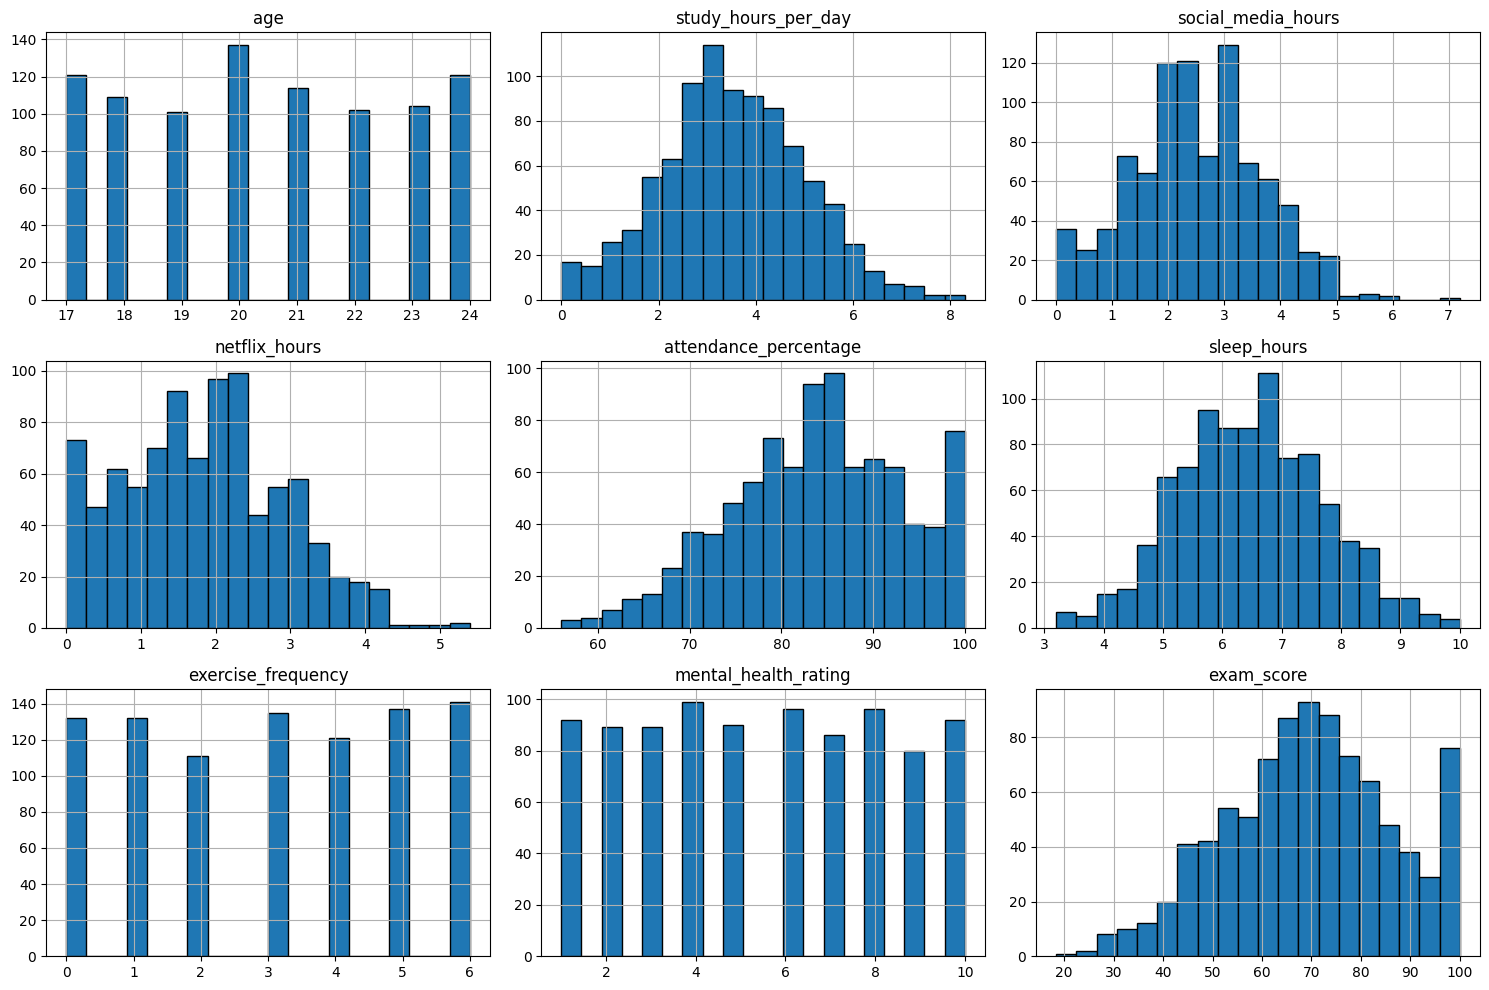

In [11]:
# Histogram for all numerical columns
df.hist(bins=20, edgecolor='black', figsize=(15, 10))
plt.tight_layout()
plt.show()

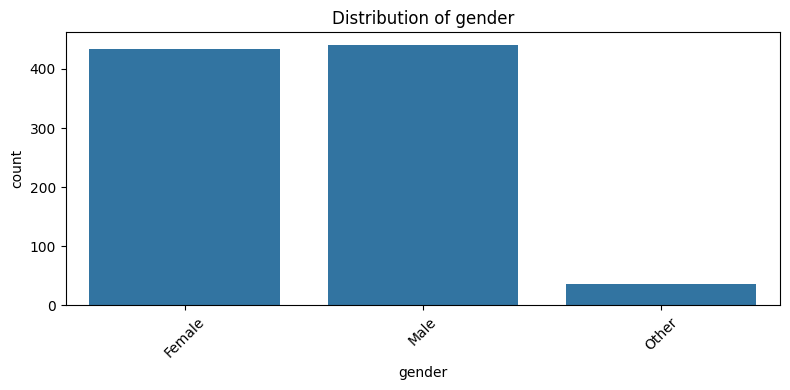

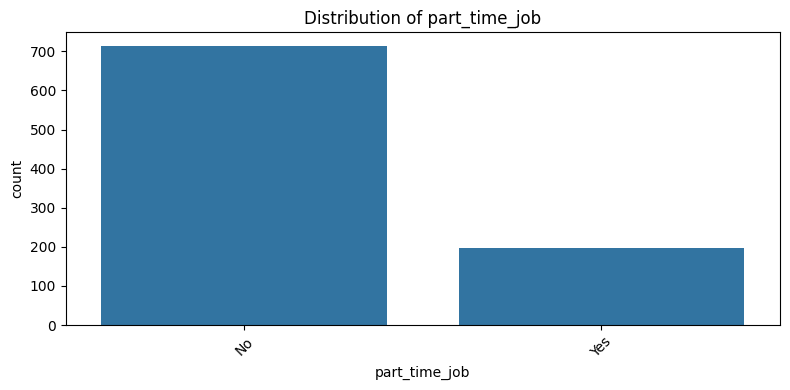

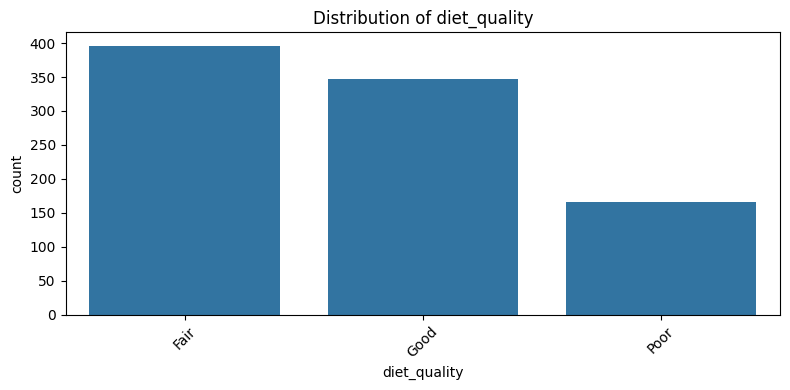

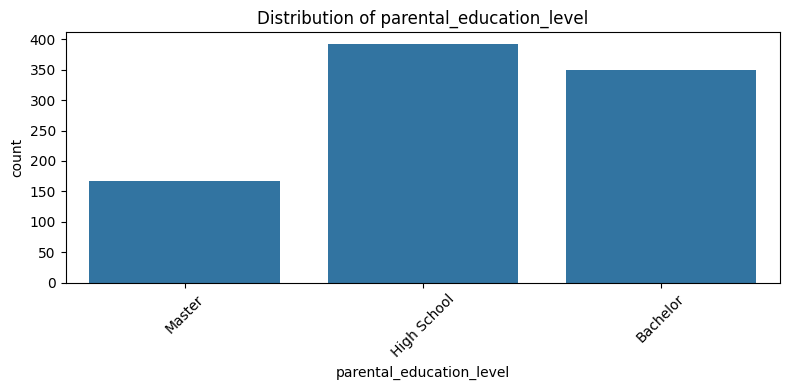

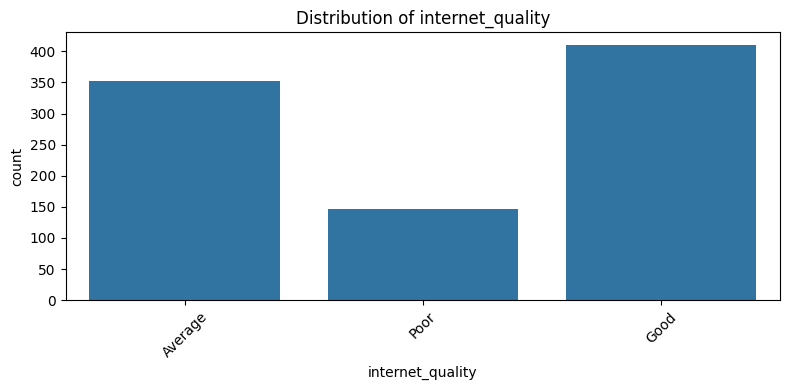

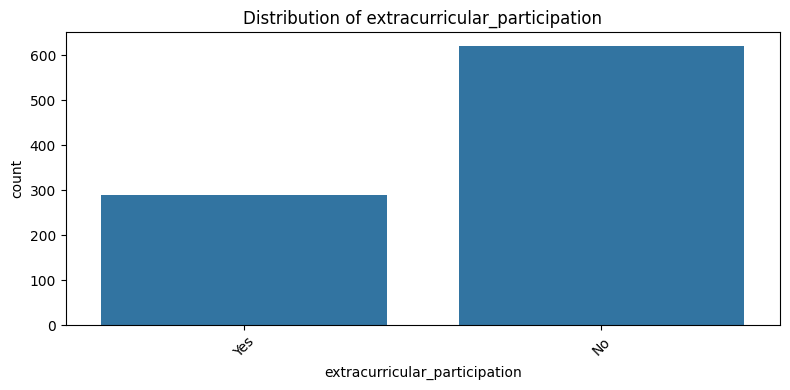

In [12]:
# Categorical columns distribution
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                    'internet_quality', 'extracurricular_participation']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

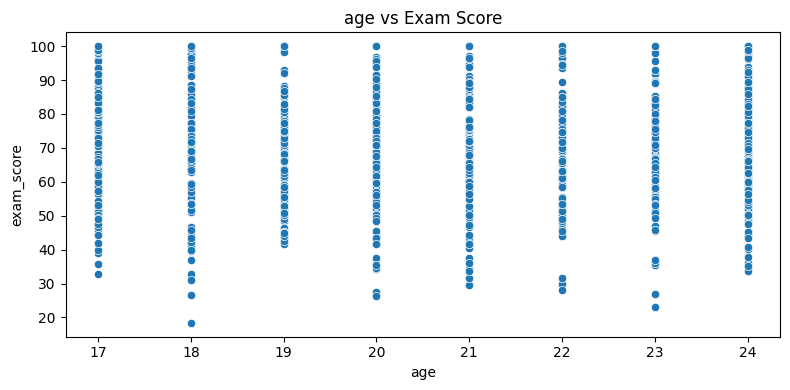

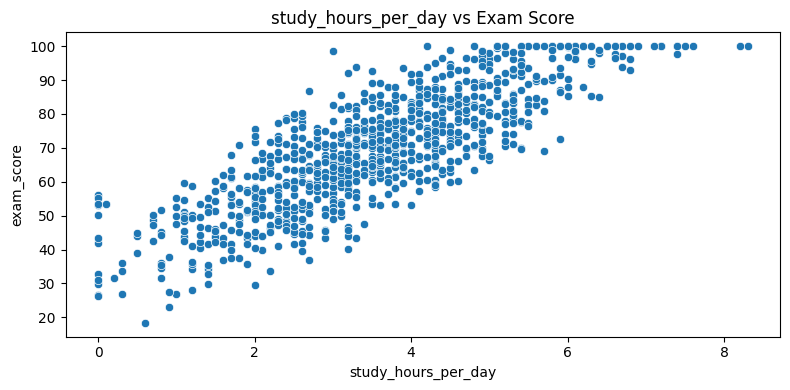

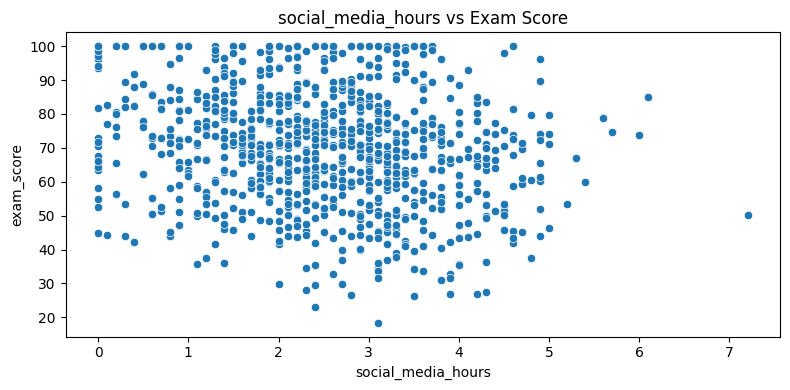

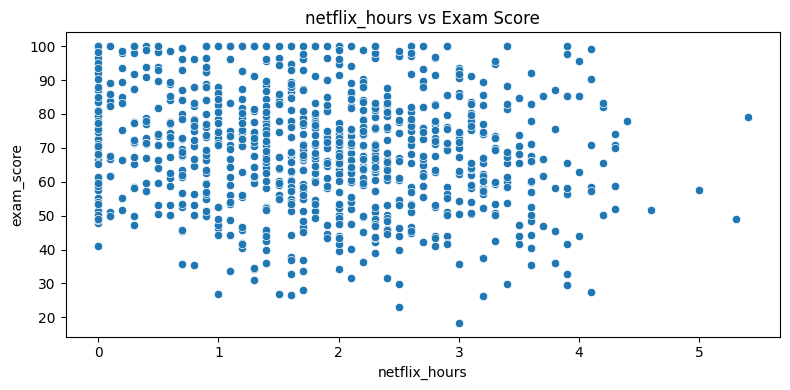

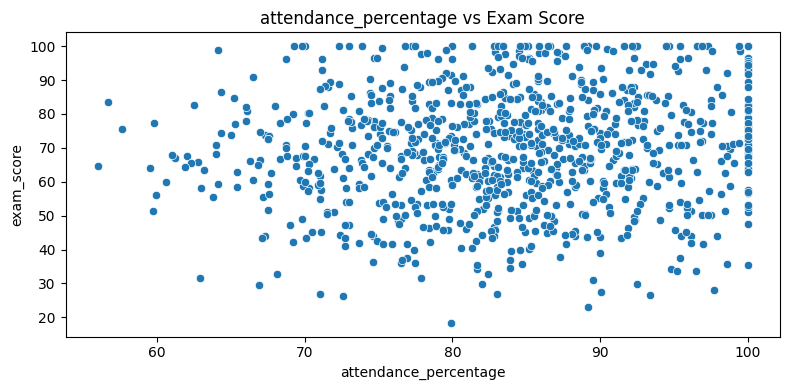

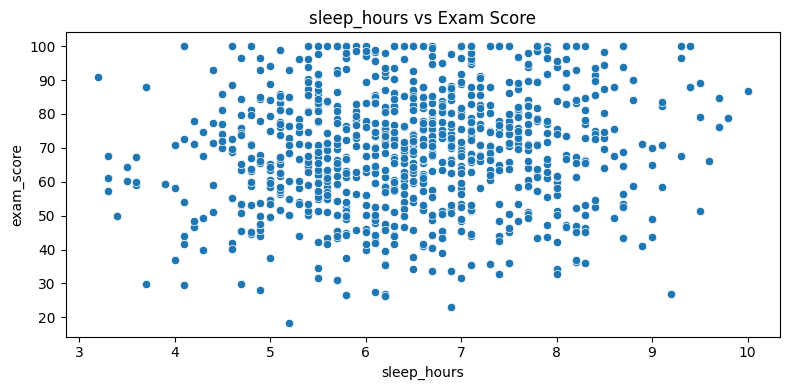

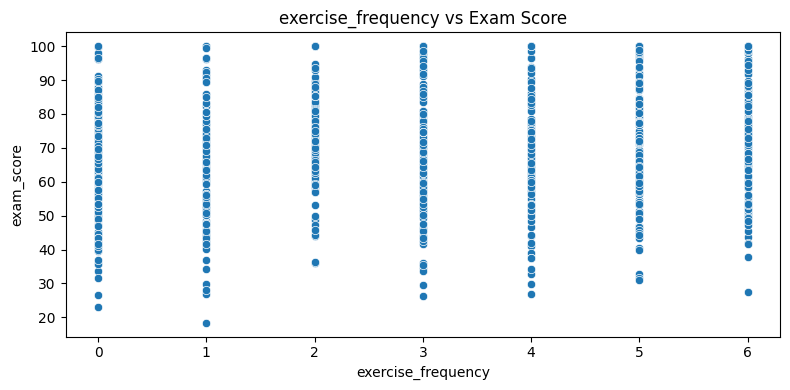

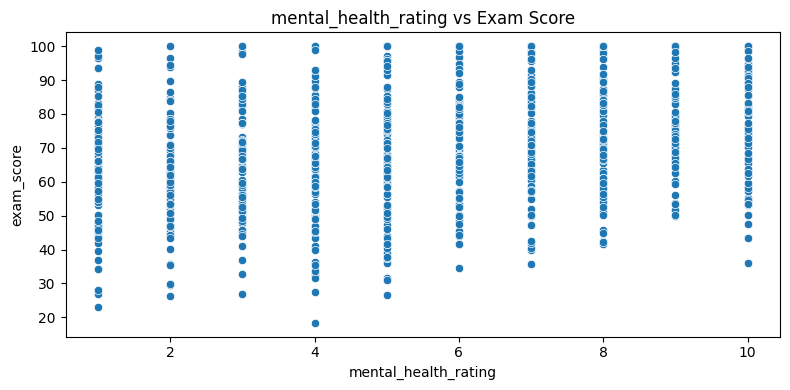

In [13]:
# Scatter plots - All numerical features vs Exam Score
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating']

for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=feature, y='exam_score')
    plt.title(f'{feature} vs Exam Score')
    plt.tight_layout()
    plt.show()

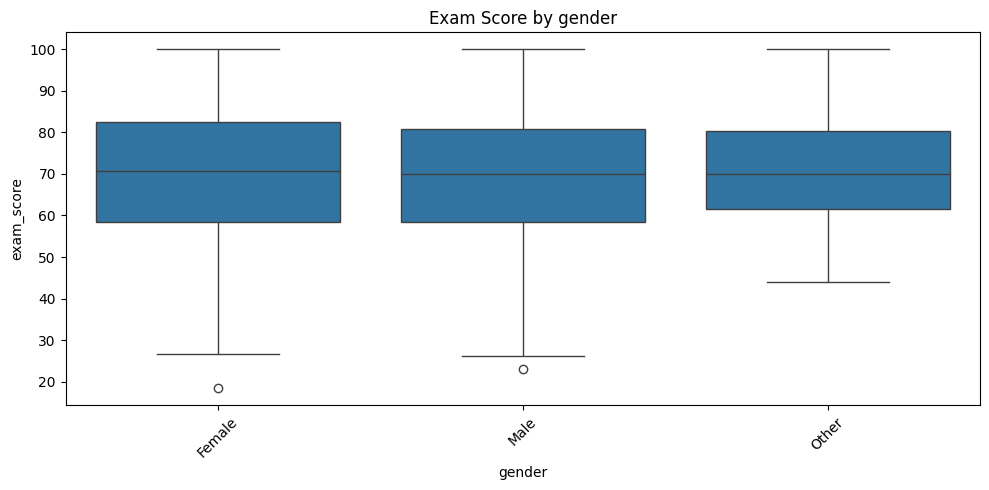

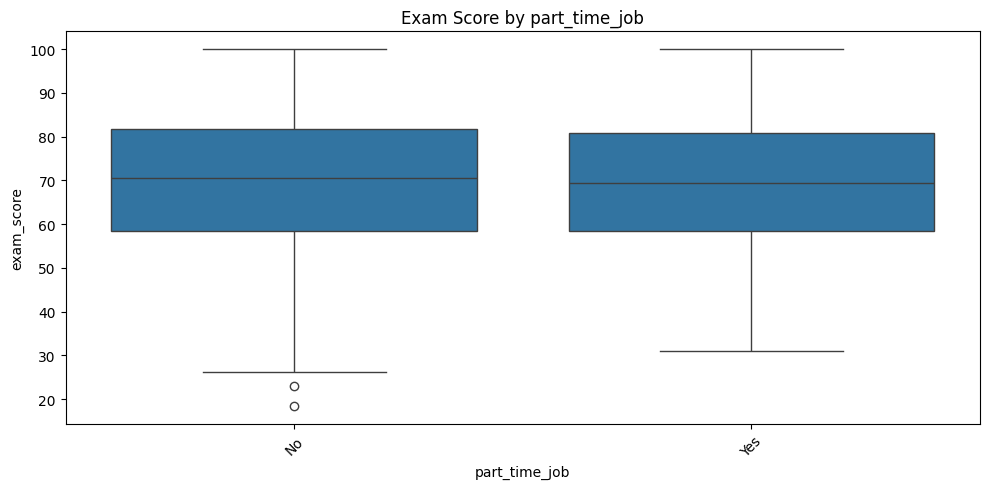

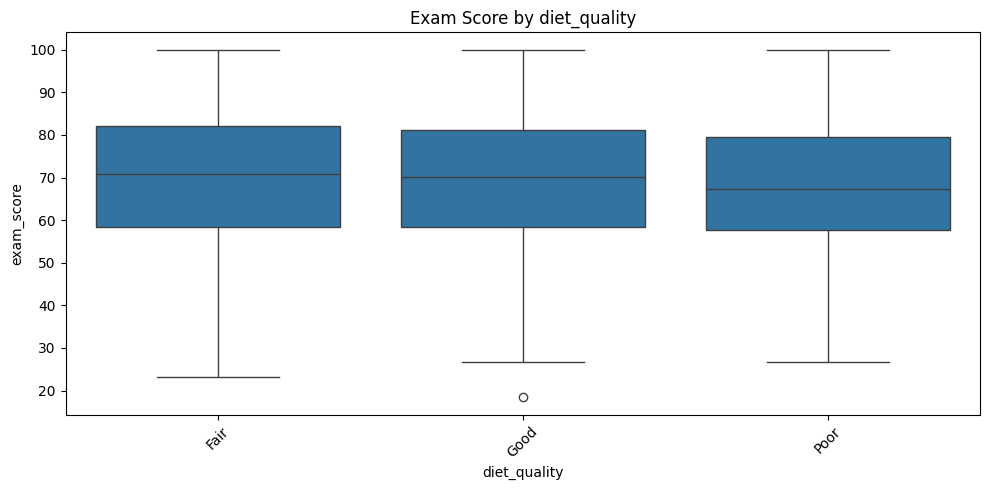

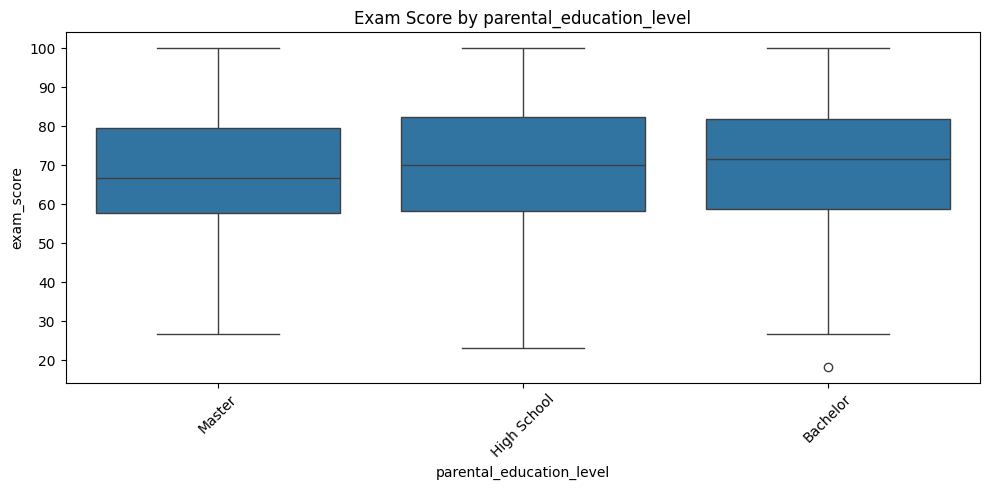

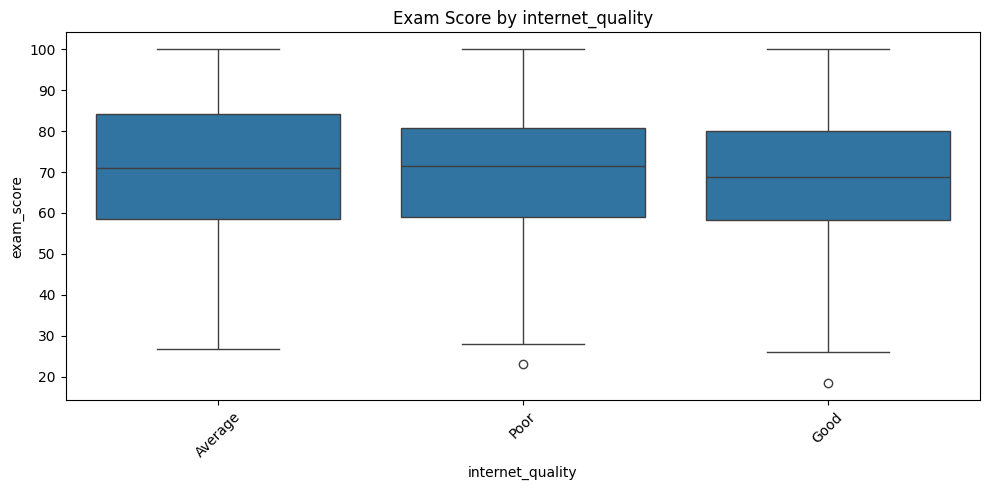

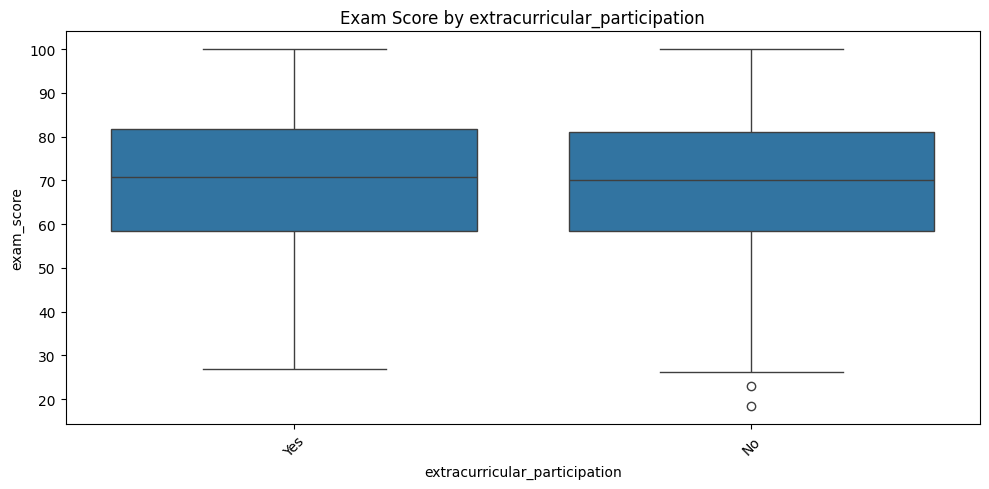

In [14]:
# Box plots - Exam Score by categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f'Exam Score by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

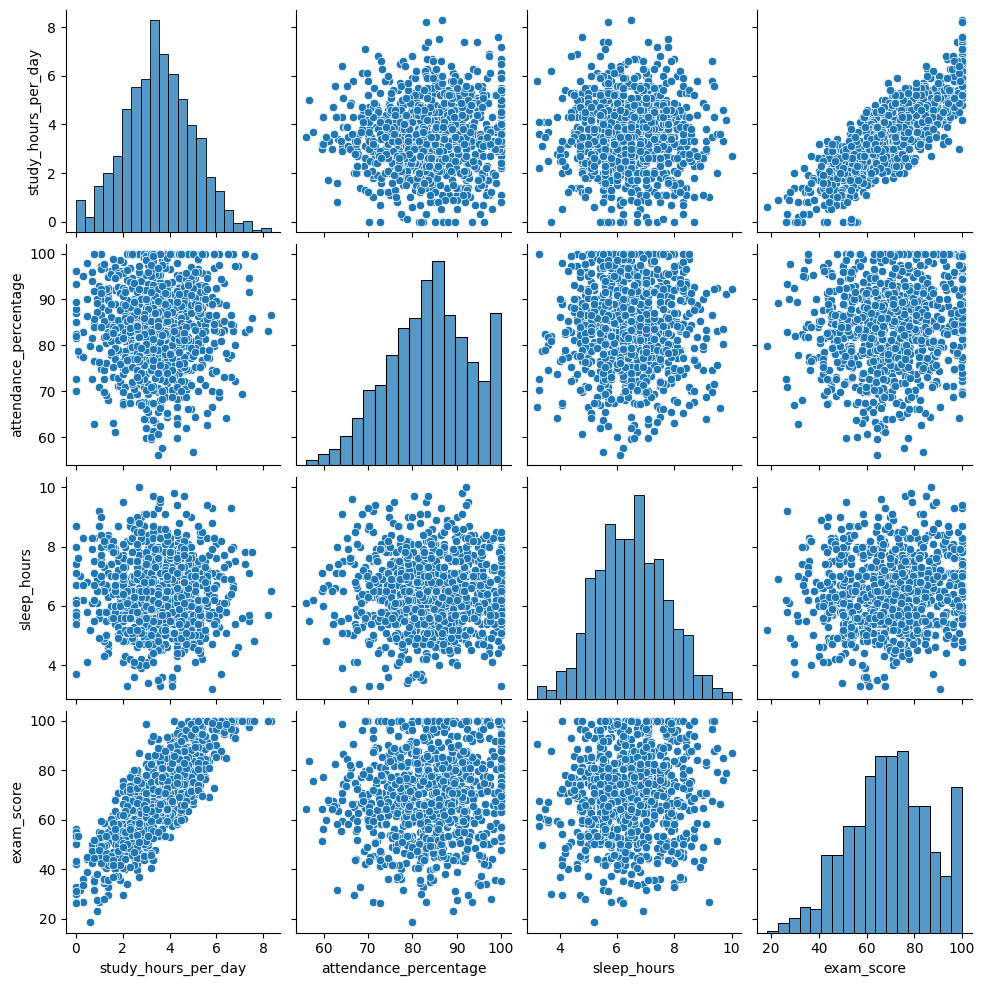

In [15]:
# Pairplot for key features
key_features = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'exam_score']
sns.pairplot(df[key_features])
plt.show()

## Step 5: Feature Selection & Encoding

In [16]:
# Select features
features = [
    'study_hours_per_day',
    'attendance_percentage',
    'mental_health_rating',
    'sleep_hours',
    'part_time_job',
    'social_media_hours',
    'netflix_hours',
    'exercise_frequency',
    'diet_quality',
    'internet_quality',
    'extracurricular_participation'
]
target = 'exam_score'

print(f"Features: {len(features)}")

Features: 11


In [17]:
# Create a copy for modeling
df_model = df[features + [target]].copy()
df_model.head()

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,social_media_hours,netflix_hours,exercise_frequency,diet_quality,internet_quality,extracurricular_participation,exam_score
0,0.0,85.0,8,8.0,No,1.2,1.1,6,Fair,Average,Yes,56.2
1,6.9,97.3,8,4.6,No,2.8,2.3,6,Good,Average,No,100.0
2,1.4,94.8,1,8.0,No,3.1,1.3,1,Poor,Poor,No,34.3
3,1.0,71.0,1,9.2,No,3.9,1.0,4,Poor,Good,Yes,26.8
4,5.0,90.9,1,4.9,No,4.4,0.5,3,Fair,Good,No,66.4


In [18]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['part_time_job', 'diet_quality', 'internet_quality', 'extracurricular_participation']
le_dict = {}

for col in categorical_cols:
    le_dict[col] = LabelEncoder()
    df_model[col] = le_dict[col].fit_transform(df_model[col])

df_model.head()

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,social_media_hours,netflix_hours,exercise_frequency,diet_quality,internet_quality,extracurricular_participation,exam_score
0,0.0,85.0,8,8.0,0,1.2,1.1,6,0,0,1,56.2
1,6.9,97.3,8,4.6,0,2.8,2.3,6,1,0,0,100.0
2,1.4,94.8,1,8.0,0,3.1,1.3,1,2,2,0,34.3
3,1.0,71.0,1,9.2,0,3.9,1.0,4,2,1,1,26.8
4,5.0,90.9,1,4.9,0,4.4,0.5,3,0,1,0,66.4


## Step 6: Split Data

In [19]:
from sklearn.model_selection import train_test_split

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 727
Testing samples: 182


## Step 7: Import ML Models

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("All models imported!")

All models imported!


## Step 8: Train & Evaluate Models

In [21]:
# Store results
results = []

# Function to evaluate model
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    results.append({'model': name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})
    
    print(f"\n{name}:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f} ({r2*100:.2f}%)")

In [22]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model('Linear Regression', y_test, y_pred_lr)


Linear Regression:
  MAE:  4.2324
  MSE:  30.1725
  RMSE: 5.4930
  R²:   0.8888 (88.88%)


In [23]:
# Model 2: Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)
y_pred_pr = pr.predict(X_test_poly)
evaluate_model('Polynomial Regression', y_test, y_pred_pr)


Polynomial Regression:
  MAE:  4.2230
  MSE:  28.2215
  RMSE: 5.3124
  R²:   0.8960 (89.60%)


In [24]:
# Model 3: Decision Tree
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model('Decision Tree', y_test, y_pred_dt)


Decision Tree:
  MAE:  6.9879
  MSE:  80.4120
  RMSE: 8.9673
  R²:   0.7038 (70.38%)


In [25]:
# Model 4: Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model('Random Forest', y_test, y_pred_rf)


Random Forest:
  MAE:  4.5395
  MSE:  33.1434
  RMSE: 5.7570
  R²:   0.8779 (87.79%)


In [26]:
# Model 5: Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
evaluate_model('Gradient Boosting', y_test, y_pred_gb)


Gradient Boosting:
  MAE:  4.2782
  MSE:  29.4462
  RMSE: 5.4264
  R²:   0.8915 (89.15%)


## Step 9: Compare Models

In [27]:
# Create results table
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R2', ascending=False)
print("\nModel Comparison (sorted by R² score):")
results_df


Model Comparison (sorted by R² score):


,model,MAE,MSE,RMSE,R2
1,Polynomial Regression,4.223034,28.221492,5.312390,0.896028
4,Gradient Boosting,4.278179,29.446213,5.426437,0.891516
0,Linear Regression,4.232441,30.172543,5.492954,0.888840
3,Random Forest,4.539505,33.143413,5.757032,0.877895
2,Decision Tree,6.987943,80.411957,8.967271,0.703750


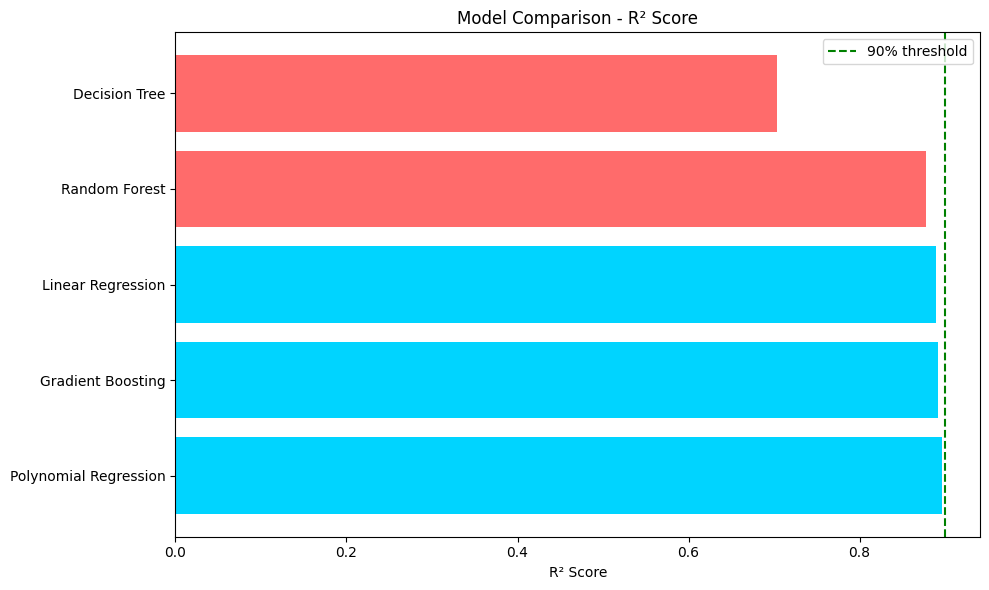

In [28]:
# Visualize R² scores
plt.figure(figsize=(10, 6))
colors = ['#00d4ff' if i < 3 else '#ff6b6b' for i in range(len(results_df))]
plt.barh(results_df['model'], results_df['R2'], color=colors)
plt.xlabel('R² Score')
plt.title('Model Comparison - R² Score')
plt.axvline(x=0.9, color='green', linestyle='--', label='90% threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Best model
best = results_df.iloc[0]
print(f"\nBest Model: {best['model']}")
print(f"R² Score: {best['R2']:.4f} ({best['R2']*100:.2f}%)")
print(f"RMSE: {best['RMSE']:.4f}")


Best Model: Polynomial Regression
R² Score: 0.8960 (89.60%)
RMSE: 5.3124


## Step 10: Feature Importance

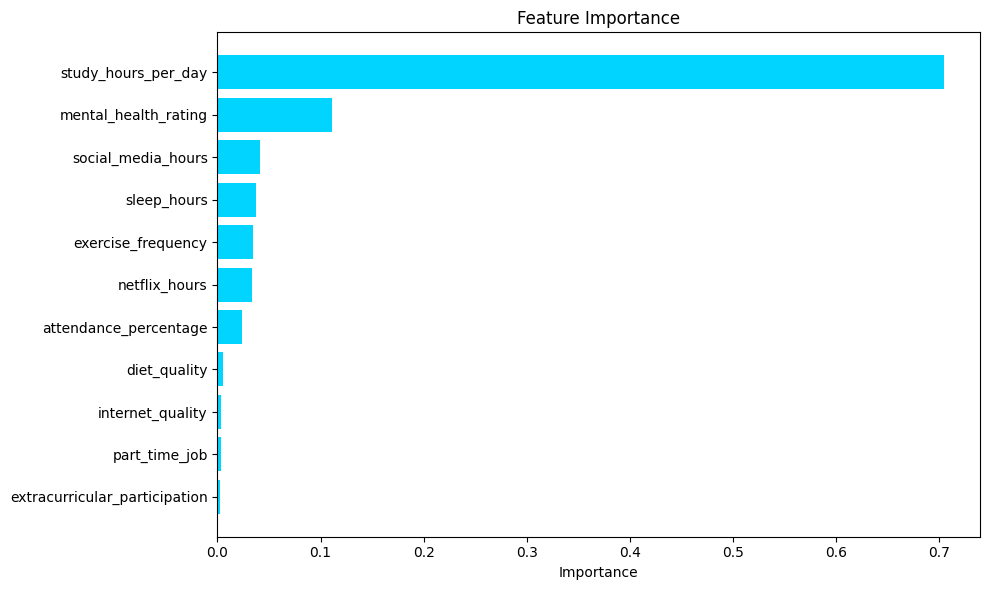

In [30]:
# Get feature importance from Random Forest
importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'], color='#00d4ff')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Step 11: Save Model

In [31]:
import joblib

# Save the best model (Gradient Boosting)
joblib.dump(gb, 'best_model.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')
joblib.dump(features, 'features_list.pkl')

# Save results
results_df.to_csv('model_results.csv', index=False)
importance.to_csv('feature_importance.csv', index=False)

# Save model info
model_info = {
    'model_name': best['model'],
    'r2_score': best['R2'],
    'rmse': best['RMSE'],
    'mae': best['MAE'],
    'mse': best['MSE'],
    'features': features
}
joblib.dump(model_info, 'model_info.pkl')

print("All files saved!")
print("- best_model.pkl")
print("- label_encoders.pkl")
print("- features_list.pkl")
print("- model_results.csv")
print("- feature_importance.csv")
print("- model_info.pkl")

All files saved!
- best_model.pkl
- label_encoders.pkl
- features_list.pkl
- model_results.csv
- feature_importance.csv
- model_info.pkl


## Step 12: Test Prediction

In [32]:
# Load and test the saved model
model = joblib.load('best_model.pkl')

# Sample prediction
sample = X_test.iloc[0:1]
actual = y_test.iloc[0]
predicted = model.predict(sample)[0]

print(f"Actual Score: {actual:.2f}")
print(f"Predicted Score: {predicted:.2f}")
print(f"Difference: {abs(actual - predicted):.2f}")

Actual Score: 59.60
Predicted Score: 63.36
Difference: 3.76
